# Filtering and Restoring of Mixed and Noise Polluted Audio Samples Using Different Approaches

In [139]:
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

inp_folder = 'audio'
outp_folder = 'output'

In [140]:
file_names = ['speech.wav', 'street-noise.wav', 'music.wav', 'white-noise.wav']

audio_speech, sr_speech = sf.read(os.path.join(inp_folder, file_names[0]))
audio_street, sr_street = sf.read(os.path.join(inp_folder, file_names[1]))
audio_music, sr_music = sf.read(os.path.join(inp_folder, file_names[2]))
audio_wnoise, sr_wnoise = sf.read(os.path.join(inp_folder, file_names[3]))

# Attenuate white noise amplitude 
audio_files = [audio_speech, audio_street, audio_music, audio_wnoise / 4]
sample_rates = [sr_speech, sr_street, sr_music, sr_wnoise]

for name, sr in zip(file_names, sample_rates):
    print("File {}: Sample Rate: {}".format(name, sr))

File speech.wav: Sample Rate: 8000
File street-noise.wav: Sample Rate: 16000
File music.wav: Sample Rate: 44100
File white-noise.wav: Sample Rate: 44100


In [147]:
# Find minimal audio length
audio_length = [len(audio_speech), len(audio_street), len(audio_music), len(audio_wnoise)]
max_length = min(audio_length)
print("Maximal Audio Length: {}".format(max_length))

Maximal Audio Length: 352800


In [154]:
# Unify audio file length
for ii, audio in enumerate(audio_files):
    audio_files[ii] = audio_files[ii][:max_length]
print(audio_files[0].shape)
print(audio_files[1].shape)
print(audio_files[2].shape)
print(audio_files[3].shape)

(352800,)
(352800, 2)
(352800, 2)
(352800, 2)


# Time-Domain

Time plot of original audio files $u$ and noise sources $v$.

| Audio | Symbol |
| --- | --- |
| Speech | $u_s$ | 
| Street Noise | $v_{sn}$ |
| Music | $u_m$ |
| White Noise | $v_{wn}$ |

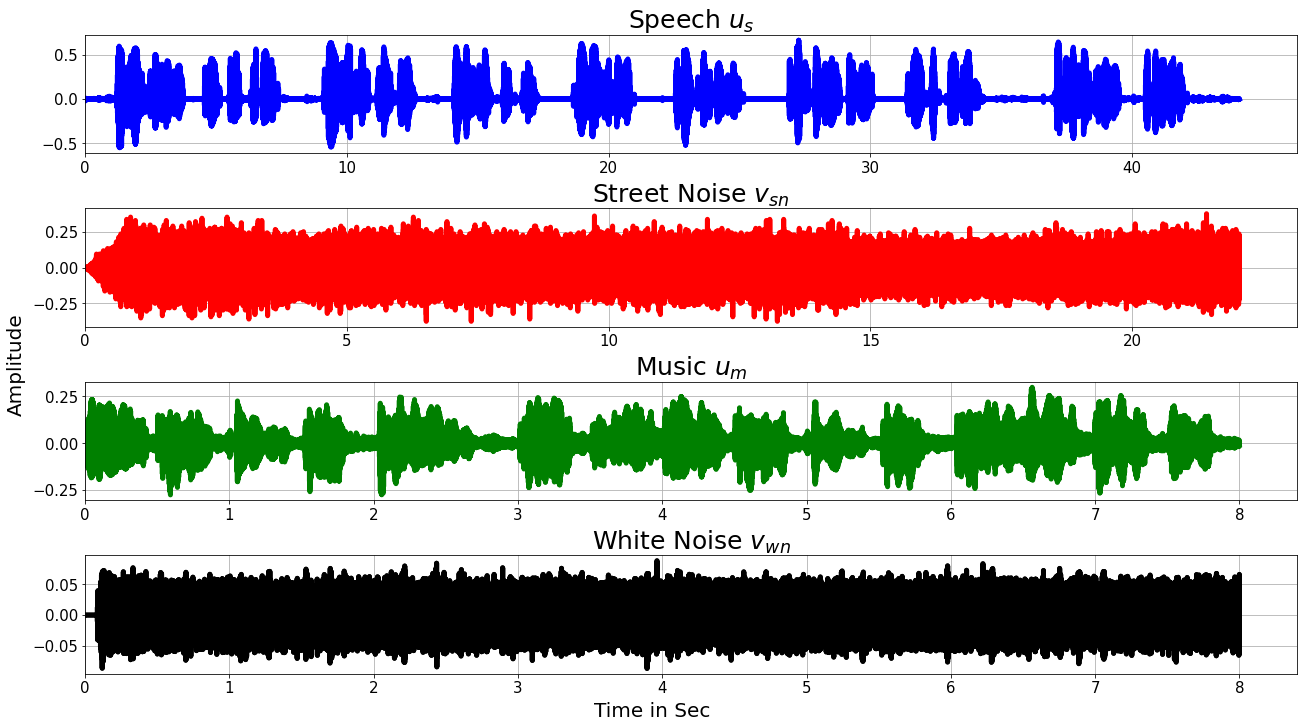

In [151]:
fig, axs = plt.subplots(4, 1, figsize=[18, 10], sharex=False, constrained_layout = True)
audio_names = ['Speech $u_s$', 'Street Noise $v_{sn}$', 'Music $u_m$', 'White Noise $v_{wn}$']
colors = ['blue', 'red', 'green', 'black']
for ii, (audio, name, sr, color) in enumerate(zip(audio_files, audio_names, sample_rates, colors)):
    x_axis = np.arange(0, len(audio)) / sr
    axs[ii].plot(x_axis, audio, lw=5, color=color)
    axs[ii].set_title(name, fontsize=25)

fig.supylabel('Amplitude', fontsize=20)
fig.supxlabel('Time in Sec', fontsize=20)

for ax in axs:
    ax.set_xlim(0)
    ax.tick_params(labelsize=15)
    ax.grid()

# Spectrum

Frequencies in original audio files.

In [152]:
# Fast Fourier Transform
from scipy.fftpack import fft, fftfreq

spectrums = []
fft_x = []
for audio, sample_rate, samples in zip(audio_files, sample_rates, audio_length):
    frequencies = fft(audio)
    T = 1/sample_rate
    x_axis = fftfreq(samples, T)[:samples//2]
    spectrums.append(2.0/samples * np.abs(frequencies[0:samples//2]))
    fft_x.append(x_axis)


ValueError: x and y must have same first dimension, but have shapes (1015223,) and (352800, 2)

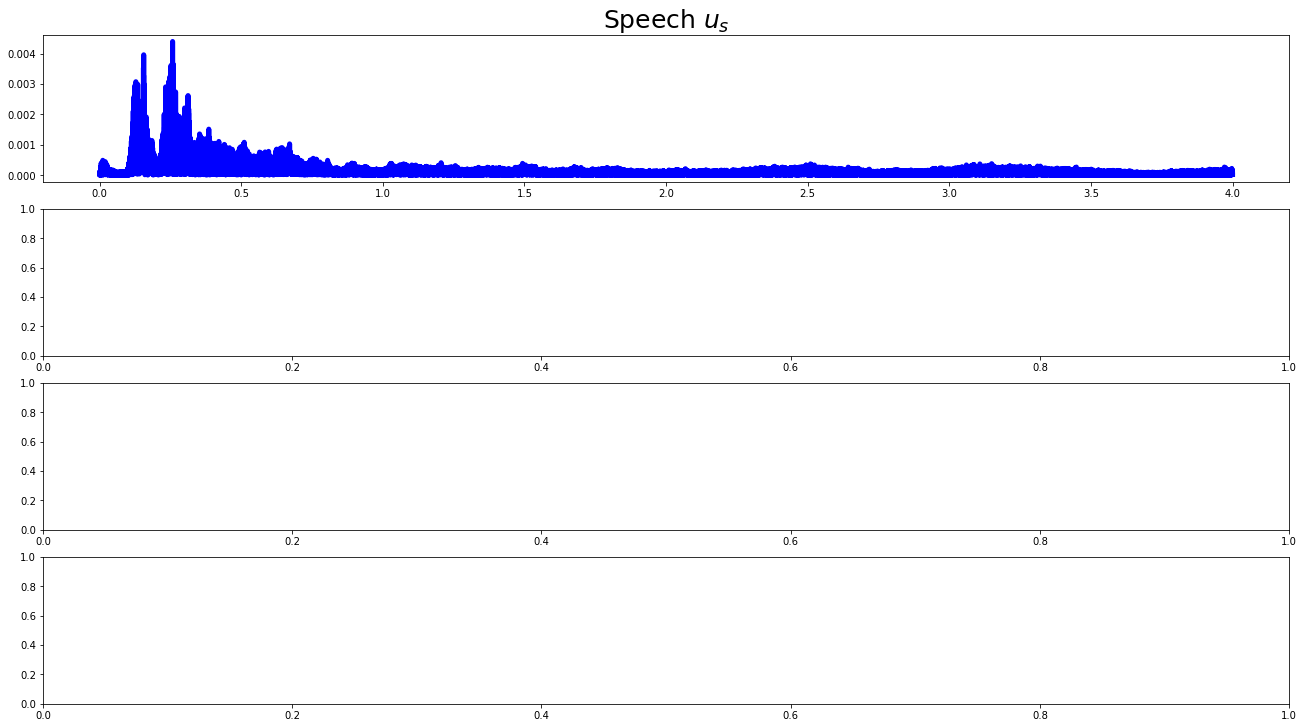

In [153]:
fig, axs = plt.subplots(4, 1, figsize=[18, 10], sharex=False, constrained_layout = True)

for ii, (spectrum, x_axis, name, color) in enumerate(zip(spectrums, fft_x, audio_names, colors)):
    axs[ii].plot(x_axis / 1e3, spectrum, lw=5, color=color)
    axs[ii].set_title(name, fontsize=25)

fig.supylabel('Magnitude', fontsize=20)
fig.supxlabel('Frequency in kHz', fontsize=20)

for ax in axs:
    ax.set_xlim(0)
    ax.tick_params(labelsize=15)
    ax.grid()

# Mix Signals

Generate four observations $d$. 

1. Music + White Noise $d_{m+wn}$
1. Street Noise + Music $d_{sn+m}$
1. Street Noise + Music + Speech $d_{sn+m+s}$
1. Speech + White Noise $d_{s+wn}$

In [146]:
# 1           Music +       White Noise
d_m_wn = audio_files[2] + audio_files[3]
# 2           Street +      Music
d_sn_m = audio_files[1] + audio_files[2]
# 3 :         Street +      Music +             Speech
d_sn_m_s = audio_files[1] + audio_files[2] + audio_files[0]
# 4 :         Speech +      White Noise
d_s_wn = audio_files[0] + audio_files[3]

observations = [d_m_wn, d_sn_m, d_sn_m_s, d_s_wn]


ValueError: operands could not be broadcast together with shapes (352800,2) (414767,2) 